<a href="https://colab.research.google.com/github/krakowiakpawel9/uczenie_maszynowe/blob/master/decision_trees/regression/03_temp_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

In [0]:
df = pd.read_csv('temps.csv')

In [0]:
def farenheit_to_celsius(farenheit):
    celsius = (farenheit - 32.) * 1.8
    return celsius

In [0]:
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
year              348 non-null int64
month             348 non-null int64
day               348 non-null int64
week              348 non-null object
temp_2            348 non-null int64
temp_1            348 non-null int64
average           348 non-null float64
actual            348 non-null int64
forecast_noaa     348 non-null int64
forecast_acc      348 non-null int64
forecast_under    348 non-null int64
friend            348 non-null int64
dtypes: float64(1), int64(10), object(1)
memory usage: 32.7+ KB


In [0]:
far_cols = ['temp_2', 'temp_1', 'average', 'actual', 'forecast_noaa', 'forecast_acc', 'forecast_under']

for col in df.columns:
    if col in far_cols:
        df[col] = df[col].apply(farenheit_to_celsius)

In [0]:
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,23.4,23.4,24.48,23.4,19.8,32.4,21.6,29
1,2016,1,2,Sat,21.6,23.4,24.66,21.6,16.2,32.4,21.6,61
2,2016,1,3,Sun,23.4,21.6,24.84,16.2,19.8,25.2,27.0,56
3,2016,1,4,Mon,21.6,16.2,25.02,14.4,21.6,28.8,25.2,53
4,2016,1,5,Tues,16.2,14.4,25.20,21.6,25.2,25.2,25.2,41


In [0]:
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,55.174138,55.262069,49.969138,54.977586,45.429310,54.672414,49.991379,60.034483
std,0.0,3.498380,8.772982,21.897717,21.816976,18.949152,21.229463,19.090343,18.988886,19.269460,15.626179
min,2016.0,1.000000,1.000000,5.400000,5.400000,23.580000,5.400000,16.200000,25.200000,21.600000,28.000000
25%,2016.0,3.000000,8.000000,39.600000,39.600000,32.355000,39.600000,28.800000,37.800000,32.400000,47.750000
50%,2016.0,6.000000,15.000000,54.900000,54.900000,47.160000,54.900000,43.200000,52.200000,46.800000,60.000000
75%,2016.0,10.000000,23.000000,70.200000,70.200000,66.645000,70.200000,61.200000,72.000000,66.600000,71.000000
max,2016.0,12.000000,31.000000,153.000000,153.000000,81.720000,108.000000,81.000000,90.000000,84.600000,95.000000


In [0]:
df.groupby('month').mean().reset_index()

,month,year,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,1,2016.0,16.000000,31.587097,31.819355,27.371613,31.935484,22.703226,31.935484,27.232258,49.290323
1,2,2016.0,14.576923,39.184615,39.807692,32.240769,40.223077,27.761538,36.623077,32.607692,47.692308
2,3,2016.0,16.000000,43.200000,44.070968,39.071613,45.174194,33.851613,43.722581,38.787097,55.193548
3,4,2016.0,15.500000,62.400000,61.980000,47.694000,61.680000,43.200000,52.980000,47.640000,57.366667
4,5,2016.0,16.000000,65.729032,66.309677,58.848387,66.948387,54.348387,63.464516,58.470968,67.096774
5,6,2016.0,15.500000,74.040000,74.220000,68.208000,73.860000,62.700000,72.720000,68.160000,72.500000
6,7,2016.0,16.000000,79.490323,79.606452,78.840000,79.606452,74.787097,82.974194,79.374194,77.032258
7,8,2016.0,11.421053,82.800000,82.705263,80.526316,82.421053,76.547368,84.410526,81.568421,75.526316
8,9,2016.0,16.500000,69.750000,69.171429,68.830714,68.978571,63.835714,73.992857,68.914286,71.000000
9,10,2016.0,15.533333,54.360000,57.420000,50.130000,54.000000,45.900000,55.080000,50.160000,56.666667


In [0]:
df.shape

(348, 12)

In [0]:
df.isnull().sum()

year              0
month             0
day               0
week              0
temp_2            0
temp_1            0
average           0
actual            0
forecast_noaa     0
forecast_acc      0
forecast_under    0
friend            0
dtype: int64

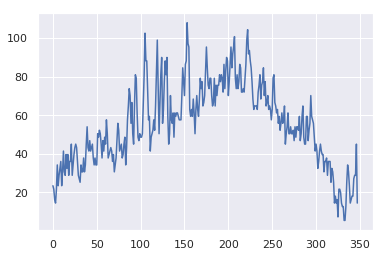

In [0]:
plt.plot(df['actual'])

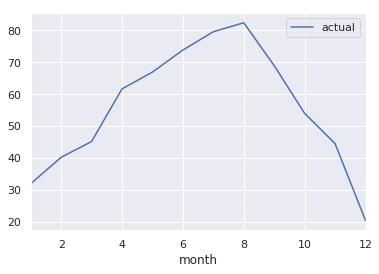

In [0]:
pd.pivot_table(df, values='actual', index='month').plot()

In [0]:
target = df.pop('actual')

In [0]:
df = pd.get_dummies(df, drop_first=True)

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, target)

In [0]:
baseline_preds = X_test.average
baseline_errors = abs(baseline_preds - y_test)
baseline_errors.mean()

9.190344827586209

In [0]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
y_pred = rf.predict(X_test)

errors = abs(y_pred - y_test)
errors.mean()

6.698896551724138

In [0]:
import numpy as np
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
accuracy

86.42179809240878

In [0]:
rf.feature_importances_

array([0.        , 0.00541835, 0.01845092, 0.01467038, 0.28001948,
       0.56931365, 0.0093319 , 0.0525946 , 0.01152676, 0.02603841,
       0.00169672, 0.00220351, 0.00230676, 0.00155343, 0.00234274,
       0.00253239])

In [0]:
df.columns

Index(['year', 'month', 'day', 'temp_2', 'temp_1', 'average', 'forecast_noaa',
       'forecast_acc', 'forecast_under', 'friend', 'week_Mon', 'week_Sat',
       'week_Sun', 'week_Thurs', 'week_Tues', 'week_Wed'],
      dtype='object')

In [0]:
for i in sorted(zip(rf.feature_importances_, df.columns))[::-1]:
    print(i)

(0.5693136513132495, 'average')
(0.28001947989408565, 'temp_1')
(0.05259459667913645, 'forecast_acc')
(0.02603841493265531, 'friend')
(0.01845092212132658, 'day')
(0.014670379754425167, 'temp_2')
(0.011526760172606877, 'forecast_under')
(0.009331899821981574, 'forecast_noaa')
(0.005418347887895387, 'month')
(0.002532391895976739, 'week_Wed')
(0.002342735596570967, 'week_Tues')
(0.0023067590881821784, 'week_Sun')
(0.002203513180463886, 'week_Sat')
(0.0016967219847282876, 'week_Mon')
(0.0015534256767154705, 'week_Thurs')
(0.0, 'year')


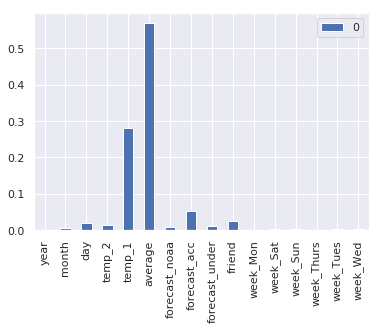

In [0]:
pd.DataFrame(rf.feature_importances_, index=df.columns).plot(kind='bar')